In [1]:
library(tidyverse)
library(ggthemes)
library(enrichR)
library(xlsx)
library(r2excel)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Welcome to enrichR
Checking connection ... 

Enrichr ... 
Connection is Live!

FlyEnrichr ... 
Connection is Live!

WormEnrichr ... 
Connection is Live!

YeastEnrichr ... 
Connection is Live!

FishEnrichr ... 
Connection is Live!

OxEnrichr ... 
Connection is Live!



In [2]:
# load data
data <- read.delim("exp1_exp2_RBP_XPO1.txt",sep="\t",header=T)

In [3]:
# use 1.2 as targets cutoff for both rep1 and rep2
data$label <- ifelse(data$nuclear_exp1>1.2 & data$nuc_exp2>1.2 &
                     data$cyto_exp1 <100 & data$Cyto_exp2<100 & 
                     data$nuclear_exp1 > data$cyto_exp1 &
                     data$nuclear_exp1 > data$Cyto_exp2 &
                     data$nuc_exp2 > data$cyto_exp1 &
                     data$nuc_exp2 > data$Cyto_exp2,
                     "enriched","non-enriched")

In [4]:
data$label2 <- ifelse(!is.na(data$label),data$label,"non-enriched")

In [5]:
table(data$label2)


    enriched non-enriched 
         263         2601 

In [130]:
write.table(data[which(data$label2=="enriched"),],"Nuc.txt",sep="\t",quote=F,row.names=F)

In [6]:
## scatter plot
p1 <- ggplot(data,aes(x = log2(nuclear_exp1), y =log2(nuc_exp2), color=label2))+
      geom_point(size=0.5) +
      geom_hline(yintercept=0)+
      geom_vline(xintercept=0)+
      geom_hline(yintercept=log2(1.2),linetype="dashed", color = "red")+
      geom_vline(xintercept=log2(1.2),linetype="dashed", color = "red")+
      xlab("Rep.1 - Nuclear enrichment\nlog2fold change (KPT-185/ctrl)") + 
      ylab("Rep.2 - Nuclear enrichment\nlog2fold change (KPT-185/ctrl)") + 
      theme_few() +
      scale_color_manual(values=c("#E69F00","#999999"))+
      coord_fixed(ratio = 1) +
      theme(axis.text = element_text(size=12))

Warning message:
“‘mode(onefile)’ differs between new and previous
	 ==> NOT changing ‘onefile’”
Warning message:
“‘length(onefile)’ differs between new and previous
	 ==> NOT changing ‘onefile’”
Warning message:
“Removed 753 rows containing missing values or values outside the scale range (`geom_point()`).”


png 
  2

Warning message:
“Removed 753 rows containing missing values or values outside the scale range (`geom_point()`).”


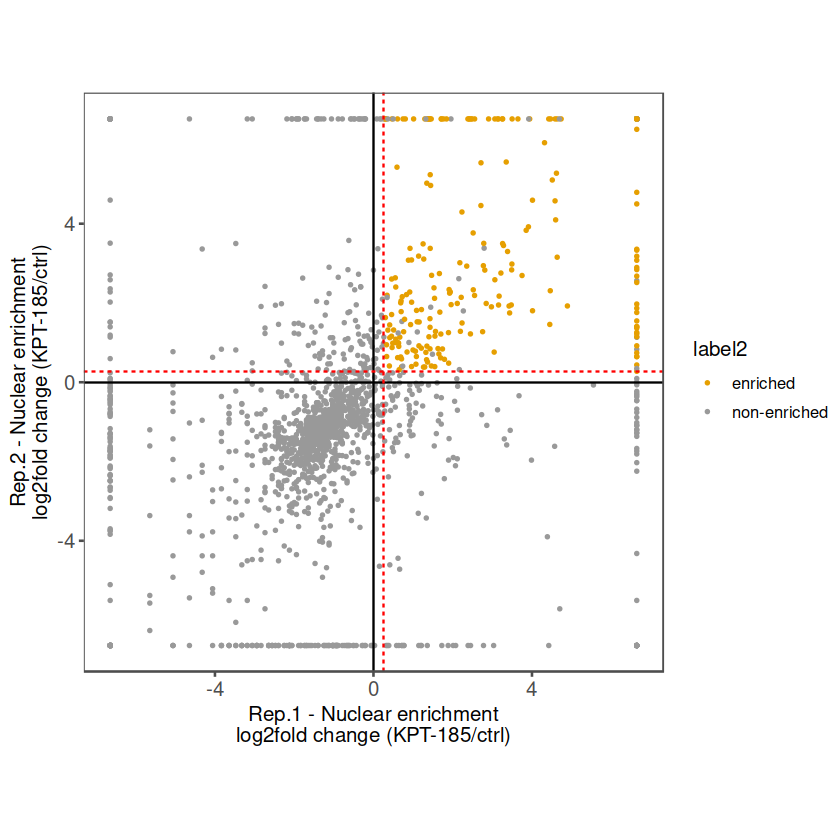

In [7]:
pdf("./Plots/nucl.pdf", p1, width = 6, height = 5)
p1
dev.off()
p1

In [8]:
# use 1.2 as Nuc targets cutoff and 1/1.2 as non-cyto targets cutoff
data$label3 <- ifelse(data$nuclear_exp1>1.2 & data$cyto_exp1<1 &
                     data$cyto_exp1 <100 &  
                     data$nuclear_exp1 > data$cyto_exp1,
                      "enriched","non-enriched")

In [9]:
table(data$label3)


    enriched non-enriched 
         436         1959 

In [131]:
write.table(data[which(data$label3=="enriched"),],"rep1.txt",sep="\t",quote=F,row.names=F)

In [10]:
p2 <- ggplot(data[!is.na(data$label3),],aes(x = log2(cyto_exp1), y =log2(nuclear_exp1), color=label3))+
      geom_point(size=0.5) +
      geom_hline(yintercept=0)+
      geom_vline(xintercept=0)+
      #geom_hline(yintercept=log2(1.2),linetype="dashed", color = "red")+
      #geom_vline(xintercept=-log2(1.2),linetype="dashed", color = "red")+
      xlab("Rep.1 - Cytosol enrichment\nlog2fold change (KPT-185/ctrl)") + 
      ylab("Rep.1 - Nuclear enrichment\nlog2fold change (KPT-185/ctrl)") + 
      theme_few() +
      scale_color_manual(values=c("#E69F00","#999999"))+
      coord_fixed(ratio = 1)+
      theme(axis.text = element_text(size=12))

Warning message:
“‘mode(onefile)’ differs between new and previous
	 ==> NOT changing ‘onefile’”
Warning message:
“‘length(onefile)’ differs between new and previous
	 ==> NOT changing ‘onefile’”
Warning message:
“Removed 151 rows containing missing values or values outside the scale range (`geom_point()`).”


png 
  2

Warning message:
“Removed 151 rows containing missing values or values outside the scale range (`geom_point()`).”


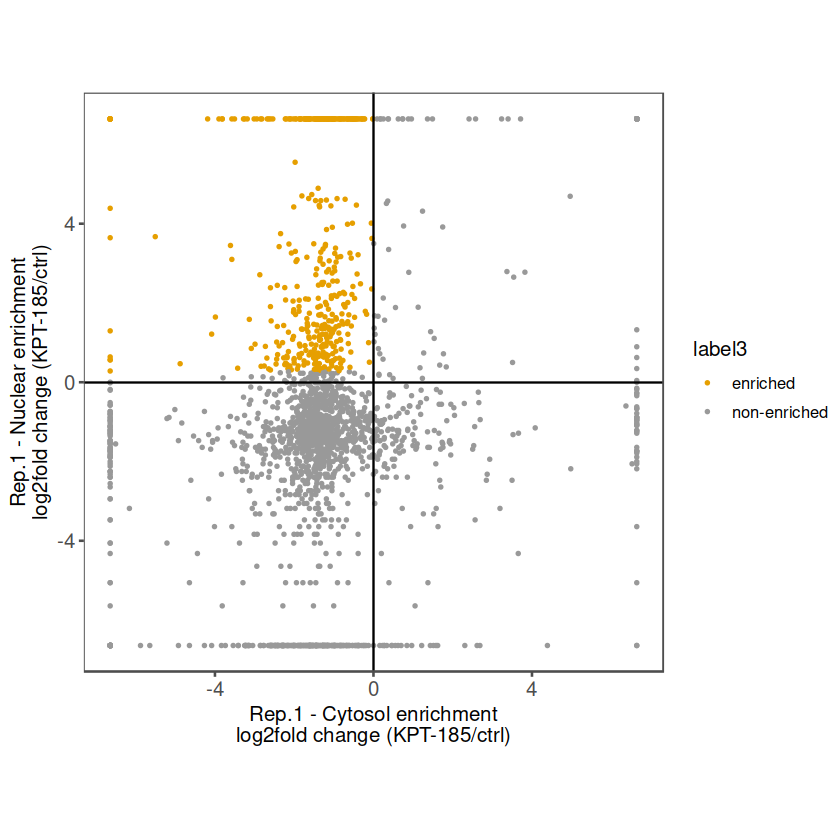

In [11]:
pdf("./Plots/nucl_vs_cyto_rep1.pdf", p1, width =6, height = 5)
p2
dev.off()
p2

In [12]:
# use 1.2 as Nuc targets cutoff and 1/1.2 as non-cyto targets cutoff
data$label4 <- ifelse(data$nuc_exp2>1.2 & data$Cyto_exp2<1 &
                      data$Cyto_exp2 <100 &  
                      data$nuc_exp2 > data$Cyto_exp2,
                      "enriched","non-enriched")

In [13]:
table(data$label4)


    enriched non-enriched 
         424         1884 

In [132]:
write.table(data[which(data$label4=="enriched"),],"rep2.txt",sep="\t",quote=F,row.names=F)

In [14]:
p3 <- ggplot(data[!is.na(data$label4),],aes(x = log2(Cyto_exp2), y =log2(nuc_exp2), color=label4))+
      geom_point(size=0.5) +
      geom_hline(yintercept=0)+
      geom_vline(xintercept=0)+
      #geom_hline(yintercept=log2(1.2),linetype="dashed", color = "red")+
      #geom_vline(xintercept=-log2(1.2),linetype="dashed", color = "red")+
      xlab("Rep.2 - Cytosol enrichment\nlog2fold change (KPT-185/ctrl)") + 
      ylab("Rep.2 - Nuclear enrichment\nlog2fold change (KPT-185/ctrl)") + 
      theme_few() +
      scale_color_manual(values=c("#E69F00","#999999"))+
      coord_fixed(ratio = 1)+
      theme(axis.text = element_text(size=12))

Warning message:
“‘mode(onefile)’ differs between new and previous
	 ==> NOT changing ‘onefile’”
Warning message:
“‘length(onefile)’ differs between new and previous
	 ==> NOT changing ‘onefile’”
Warning message:
“Removed 180 rows containing missing values or values outside the scale range (`geom_point()`).”


png 
  2

Warning message:
“Removed 180 rows containing missing values or values outside the scale range (`geom_point()`).”


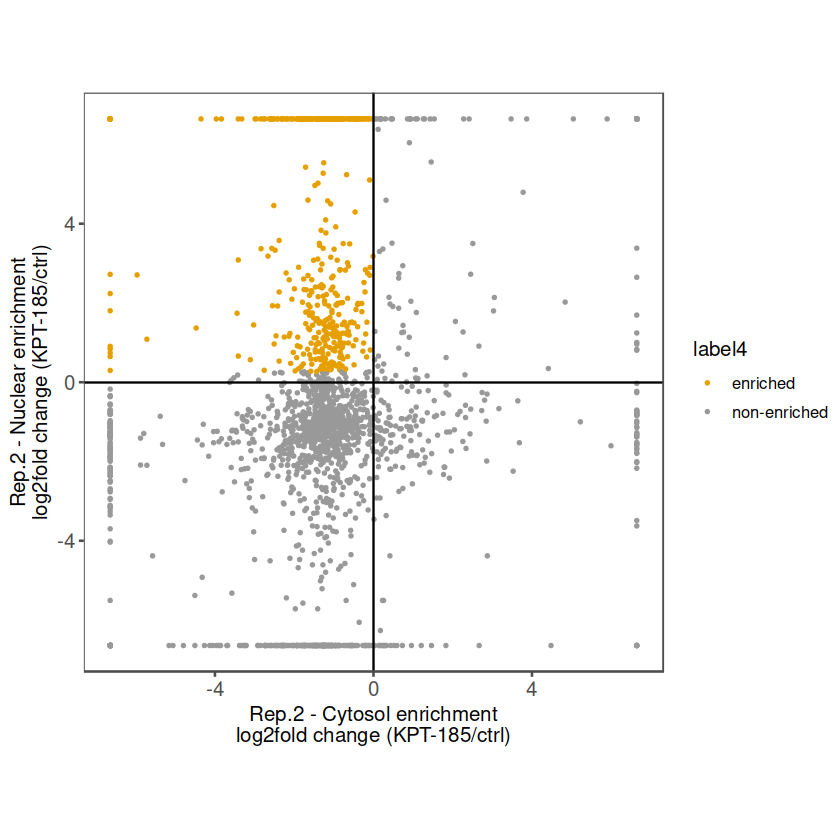

In [15]:
pdf("./Plots/nucl_vs_cyto_rep2.pdf", p1, width = 6, height =5)
p3
dev.off()
p3

In [16]:
#function enrichment
websiteLive <- getOption("enrichR.live")
setEnrichrSite("Enrichr")  # human genes   

Connection changed to https://maayanlab.cloud/Enrichr/

Connection is Live!



In [17]:
dbs <- c("GO_Molecular_Function_2023", "GO_Cellular_Component_2023", "GO_Biological_Process_2023",
    "KEGG_2021")

file_name = "Functional_enrichment.xlsx"
fun_enrich <- function(list = list, out = out) {
    enriched <- enrichr(list, dbs)
    res <- rbind(enriched[[1]], enriched[[2]], enriched[[3]], enriched[[4]])
    res2 <- res[which(res$Adjusted.P.value < 0.05), ]
    res3 <- res2[order(res2$Adjusted.P.value), ]
    # barplot
    options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)
    res3$GeneCount <- as.numeric(gsub("/.*$", "", res3$Overlap))
    if (dim(res3)[1] < 20) {
        p <- ggplot(data = res3, aes(x = reorder(Term, -Adjusted.P.value), y = GeneCount,
            fill = Adjusted.P.value)) + geom_bar(stat = "identity")
    } else {
        p <- ggplot(data = res3[1:20, ], aes(x = reorder(Term, -Adjusted.P.value),
            y = GeneCount, fill = Adjusted.P.value)) + geom_bar(stat = "identity")
    }

    # Horizontal bar plot
    p2 <- p + coord_flip() + scale_fill_gradient(low = "red", high = "yellow") +
        theme_few() + xlab("Enriched Terms") + ggtitle(out)
    ggsave(paste0("Plots/", out, "_top20_barplot.png"), p2, width = 12, height = 5)

    # write outputs
    sheet_name = out
    # Check if an excel spreadsheet already exists, otherwise create one
    if (file.exists(file_name)) {
        wb <- loadWorkbook(file = file_name)
    } else {
        wb <- createWorkbook(type = "xlsx")
    }

    # Create new excel sheet, remove sheets if it already exits (if the sheet
    # name is too long, the errors might occur)
    sheets <- getSheets(wb)
    if (is.element(sheet_name, names(sheets))) {
        removeSheet(wb, sheetName = sheet_name)
    }
    sheet <- createSheet(wb, sheetName = sheet_name)
    xlsx.addTable(wb = wb, sheet = sheet, data = res3, startRow = 1, startCol = 1)
    # Write sorted table to Excel file as different worksheets. Need file name
    # + Worksheet name !!!
    saveWorkbook(wb, file_name)
}

In [18]:
fun_enrich(data[which(data$label2=="enriched"),]$GenSymbol, "Nucl_overlaped")
fun_enrich(data[which(data$nuclear_exp1>1.2),]$GenSymbol, "Nucl_rep1")
fun_enrich(data[which(data$nuc_exp2>1.2),]$GenSymbol, "Nucl_rep2")
fun_enrich(data[which(data$label3=="enriched"),]$GenSymbol, "rep1")
fun_enrich(data[which(data$label4=="enriched"),]$GenSymbol, "rep2")

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying KEGG_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying KEGG_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying KEGG_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... Done.
  Querying GO_Cellular_Component_2023... Done.
  Querying GO_Biological_Process_2023... Done.
  Querying KEGG_2021... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2023... 

In [19]:
###RRM enrichment

In [20]:
data$RRM <- ifelse(str_detect(data$domains.count.,"RRM"),1,0)

In [21]:
sum(data$RRM)

[1] 137

In [22]:
###RRM enrichment for nuc1

In [23]:
n1 <- dim(data[which(data$nuclear_exp1>1.2 & data$RRM==1),])[1]
n2 <- dim(data[!is.na(data$nuclear_exp1) & data$nuclear_exp1<=1.2 & data$RRM==1,])[1] 
N1 <- dim(data[which(data$nuclear_exp1>1.2 & data$RRM==0),])[1]
N2 <- dim(data[!is.na(data$nuclear_exp1) & data$nuclear_exp1<=1.2 & data$RRM==0,])[1]

In [24]:
matrix <- matrix(c(n1,N1,n2,N2),nrow=2)
matrix

14,119
550,1670


In [25]:
fisher.test(matrix)


	Fisher's Exact Test for Count Data

data:  matrix
p-value = 9.112e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.1879794 0.6300049
sample estimates:
odds ratio 
 0.3573655 


In [26]:
###RRM enrichment for nuc2

In [27]:
n1 <- dim(data[which(data$nuc_exp2>1.2 & data$RRM==1),])[1]
n2 <- dim(data[!is.na(data$nuc_exp2) & data$nuc_exp2<=1.2 & data$RRM==1,])[1] 
N1 <- dim(data[which(data$nuc_exp2>1.2 & data$RRM==0),])[1]
N2 <- dim(data[!is.na(data$nuc_exp2) & data$nuc_exp2<=1.2 & data$RRM==0,])[1]

In [28]:
matrix <- matrix(c(n1,N1,n2,N2),nrow=2)
matrix

14,118
561,1572


In [29]:
fisher.test(matrix)


	Fisher's Exact Test for Count Data

data:  matrix
p-value = 1.945e-05
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.1749467 0.5865329
sample estimates:
odds ratio 
 0.3326001 


In [57]:
data2 <- data[,c(1,2,7,8,9,10,41,63,64,65,66)]

In [58]:
data3 <- data2 %>% 
    mutate(domains.count. = strsplit(as.character(domains.count.), ",")) %>% 
    unnest(domains.count.)

In [59]:
data3$domains <- gsub("\\[.*","",data3$domains.count.)

In [67]:
data3$count <- as.numeric(gsub("]","",gsub(".*\\[","",data3$domains.count.)))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [68]:
length(unique(data3$domains))

[1] 664

In [94]:
Nuc <- data3 %>%
filter(label2=="enriched" & domains!=".") %>%
select(domains,count) %>%
group_by(domains) %>%
summarise(number=sum(count))

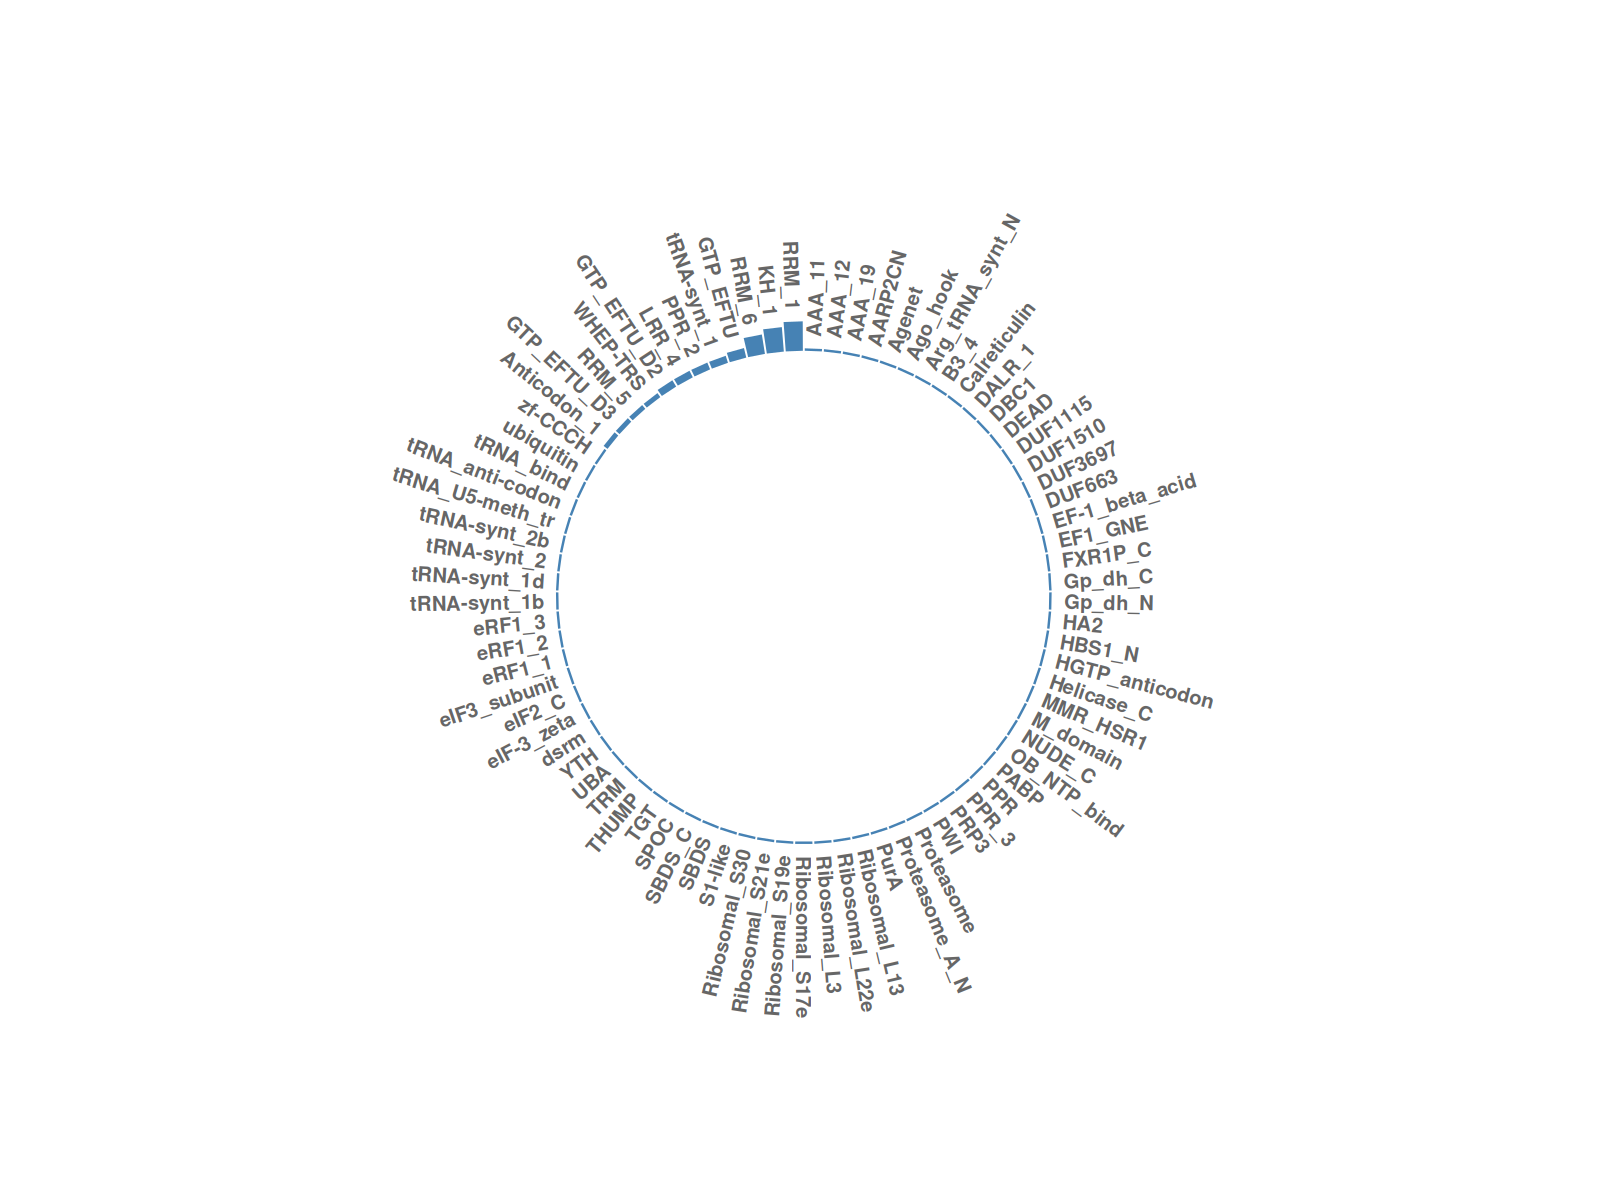

In [127]:
# Get the name and the y position of each label
label_data <- Nuc %>% arrange(number)
label_data$id <- seq(1, nrow(label_data))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# Make the plot
p <- ggplot(label_data, aes(x=as.factor(id), y=number)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  geom_bar(stat="identity", fill="steelblue") +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar(start = 0) + 
  geom_text(data=label_data, aes(x=id, y=number+5, label=domains, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
 
p
ggsave(paste0("Plots/Nuc_domains_circular_barplot.pdf"), p, width = 12, height = 12)


In [128]:
head(data3)

Accession,GenSymbol,cyto_exp1,nuclear_exp1,Cyto_exp2,nuc_exp2,domains.count.,label,label2,label3,label4,domains,count,domains2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
P23246,SFPQ,0.047,0.36,0.046,0.364,RRM_1[2],non-enriched,non-enriched,non-enriched,non-enriched,RRM_1,2,RRM
P23246,SFPQ,0.047,0.36,0.046,0.364,NOPS[1],non-enriched,non-enriched,non-enriched,non-enriched,NOPS,1,NOPS
P62995,TRA2B,0.332,0.38,0.301,0.515,RRM_1[1],non-enriched,non-enriched,non-enriched,non-enriched,RRM_1,1,RRM
P31943,HNRH1,0.371,0.38,0.425,0.394,zf-RNPHF[1],non-enriched,non-enriched,non-enriched,non-enriched,zf-RNPHF,1,zf-RNPHF
P31943,HNRH1,0.371,0.38,0.425,0.394,RRM_6[3],non-enriched,non-enriched,non-enriched,non-enriched,RRM_6,3,RRM
P98175,RBM10,1.450,0.38,0.470,0.513,G-patch[1],non-enriched,non-enriched,non-enriched,non-enriched,G-patch,1,G-patch


In [113]:
data3$domains2 <- sub("_.*","",data3$domains)

In [114]:
head(data3)

Accession,GenSymbol,cyto_exp1,nuclear_exp1,Cyto_exp2,nuc_exp2,domains.count.,label,label2,label3,label4,domains,count,domains2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
P23246,SFPQ,0.047,0.36,0.046,0.364,RRM_1[2],non-enriched,non-enriched,non-enriched,non-enriched,RRM_1,2,RRM
P23246,SFPQ,0.047,0.36,0.046,0.364,NOPS[1],non-enriched,non-enriched,non-enriched,non-enriched,NOPS,1,NOPS
P62995,TRA2B,0.332,0.38,0.301,0.515,RRM_1[1],non-enriched,non-enriched,non-enriched,non-enriched,RRM_1,1,RRM
P31943,HNRH1,0.371,0.38,0.425,0.394,zf-RNPHF[1],non-enriched,non-enriched,non-enriched,non-enriched,zf-RNPHF,1,zf-RNPHF
P31943,HNRH1,0.371,0.38,0.425,0.394,RRM_6[3],non-enriched,non-enriched,non-enriched,non-enriched,RRM_6,3,RRM
P98175,RBM10,1.450,0.38,0.470,0.513,G-patch[1],non-enriched,non-enriched,non-enriched,non-enriched,G-patch,1,G-patch


In [115]:
Nuc2 <- data3 %>%
filter(label2=="enriched" & domains2!=".") %>%
select(domains2,count) %>%
group_by(domains2) %>%
summarise(number=sum(count))

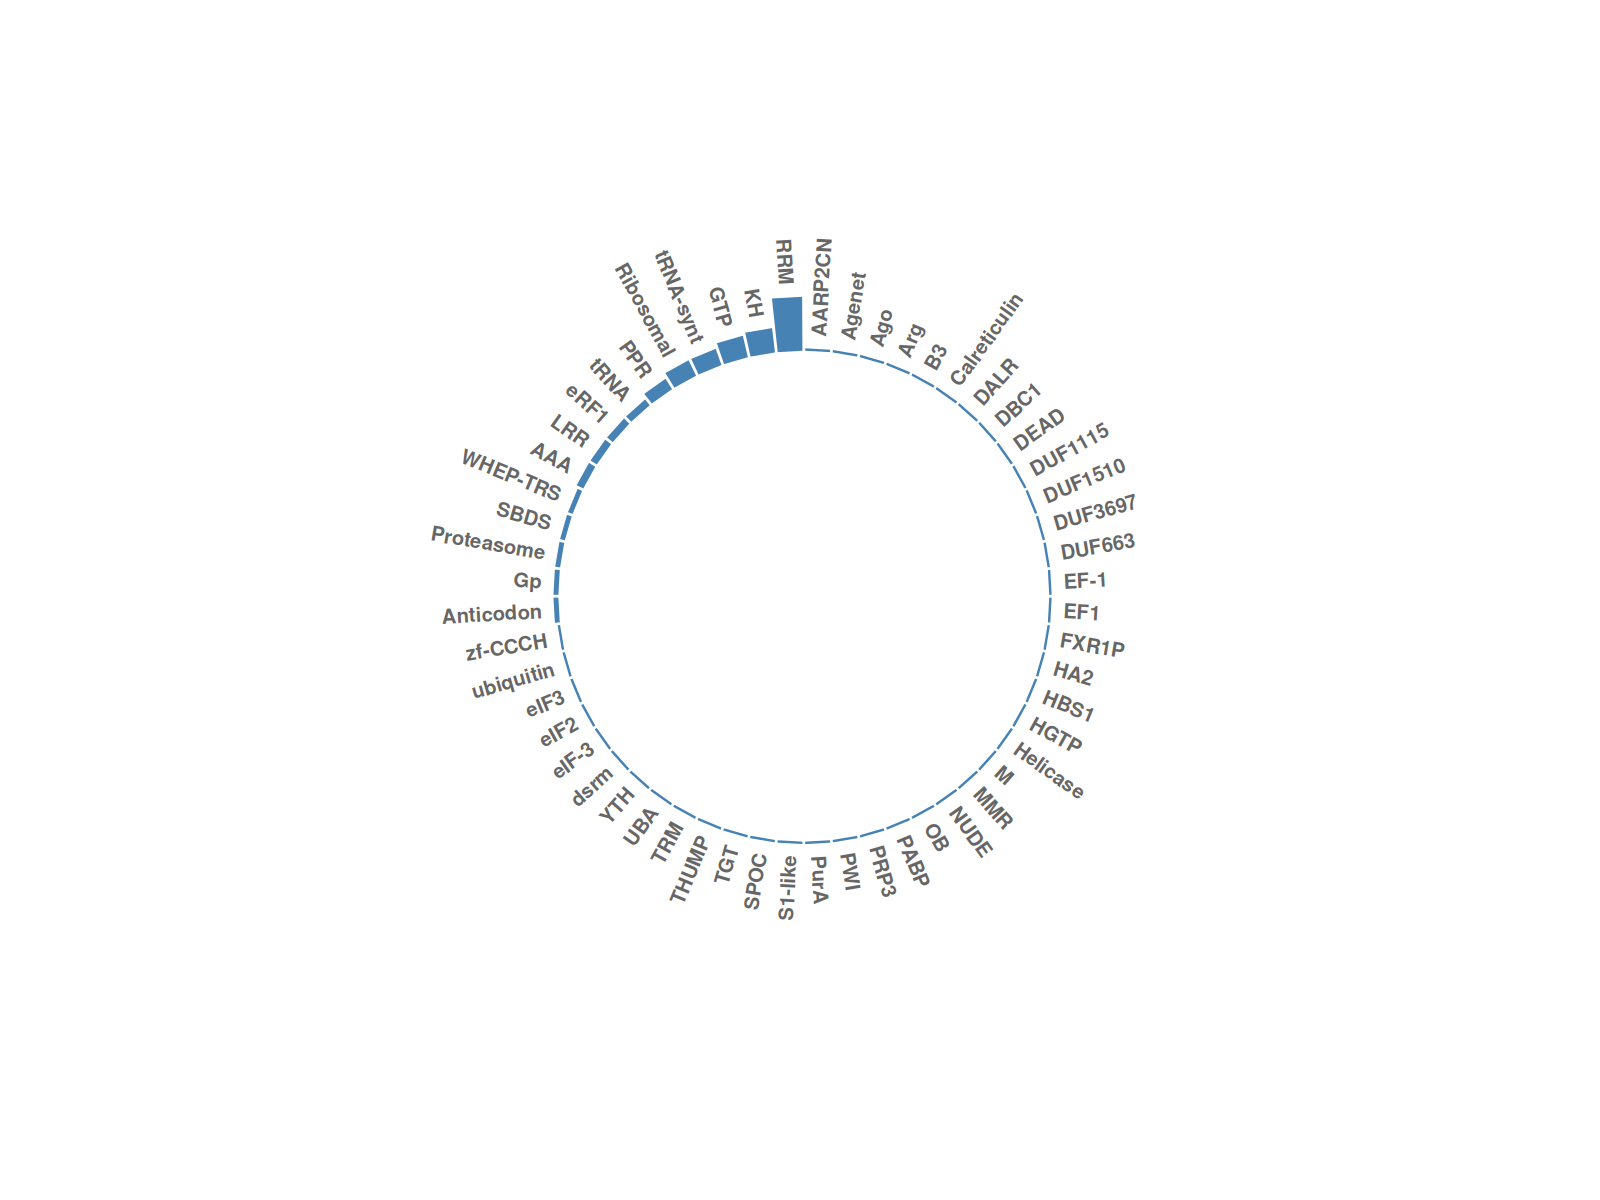

In [126]:
# Get the name and the y position of each label
label_data <- Nuc2 %>% arrange(number)
label_data$id <- seq(1, nrow(label_data))
number_of_bar <- nrow(label_data)
angle <- 90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_data$hjust <- ifelse( angle < -90, 1, 0)
label_data$angle <- ifelse(angle < -90, angle+180, angle)
 
# Make the plot
p2 <- ggplot(label_data, aes(x=as.factor(id), y=number)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  geom_bar(stat="identity", fill="steelblue") +
  ylim(-100,120) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar(start = 0) + 
  geom_text(data=label_data, aes(x=id, y=number+5, label=domains2, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
 
p2
ggsave(paste0("Plots/Nuc_domains_combine_circular_barplot.pdf"), p2, width = 8, height = 8)
